# HW2


Before submitting your **HTpy-HW2.ipynb** file, perform the following
* `Kernel>Restart & Run All`
* Make sure that there are no errors

The following includes problems that need coding and others that only need to perform simple operations (python as a calculator).

In [1]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

## 1 Insulation

This problem is an expansion of PB 3 in `HTpy-HW2.ipynb`

Assuming that the outer surface temperature of the pipe is $150^\circ C$, find an insulation that works (i.e. an insulation that will not melt, for which you can find the price and thermal conductivity online). Derive the necessary equations that allow for determination of the different costs as a function of the thickness. Generate a plot for at least 3 different thicknesses.

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
Assumptions:
* Heat transfer is steady and 1D
* Conservation of Energy applies to the fiberglass insulation with a 90% efficiency
* Thermal Conductivity (k) for fiberglass insulation is 0.62 W/mk
* Energy lost E_{lost} may include radiation, conduction and/or convection


Energy conservation reduces to
$$
\dot{E}_{in} - \dot{E}_{out} = 0
$$



$$
\dot{E}_{in} = q_{cond}
$$



$$
\dot{E}_{out} = q_{loss} = (0.1)q_{cond}
$$



$$
q_{cond} = -k \frac{T_1 - T_0}{t}
$$



$$
-k \frac{T_1 - T_0}{t} - (0.1)q_{loss} = 0
$$


q1 is -6102 watts
q2 is -3051 watts
q3 is -2034 watts
The cost of half-inch insulated operation for a year is $4277
The cost of one inch insulated operation for a year is $2138
The cost of one and a half-inch insulated operation for a year is $1426


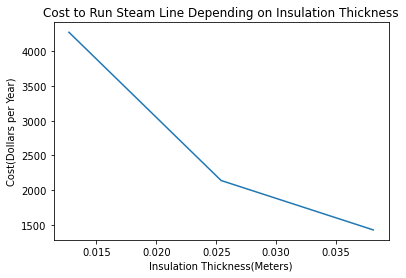

In [2]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
D = 0.1
L = 25.
q = 18405.
h = 10.
T_0 = 25.
T_1 = 150.
k = 0.62
eps = 0.8
eta_f = 0.9
Cost = 0.02
#Denoting three thicknesses of insulation
t1 = 0.0127 #0.25 in
t2 = 0.0254 #0.5 in
t3 = 0.0381 #1 in
A = np.pi*D*L

#Using Fourier's law to determine heat lost by the insulation
q_1 = -k*(T_1 - T_0)*(1/t1)
q_2 = -k*(T_1 - T_0)*(1/t2)
q_3 = -k*(T_1 - T_0)*(1/t3)



print('q1 is %.f watts' %q_1)
print('q2 is %.f watts' %q_2)
print('q3 is %.f watts' %q_3)

I_cost1 = abs(q_1)*(365*24*3600)/0.9*Cost*1e-6
print('The cost of half-inch insulated operation for a year is $%.f' %I_cost1)

I_cost2 = abs(q_2)*(365*24*3600)/0.9*Cost*1e-6
print('The cost of one inch insulated operation for a year is $%.f' %I_cost2)

I_cost3 = abs(q_3)*(365*24*3600)/0.9*Cost*1e-6
print('The cost of one and a half-inch insulated operation for a year is $%.f' %I_cost3)



x = [t1,t2,t3] 
y = [I_cost1,I_cost2,I_cost3]  
plt.plot(x, y)
plt.xlabel('Insulation Thickness(Meters)') 
plt.ylabel('Cost(Dollars per Year)') 
plt.title('Cost to Run Steam Line Depending on Insulation Thickness') 
plt.show() 

## 2 Window

Set up equations and apply realistic numerical values to them to discuss heat losses of a single pane window, a single pane window with storm window and a double paned window with air trapped at a vacuum of $10^{-3} \mathrm{torr}$ ina gap of $5\mathrm{mm}$. Do not consider the effects of radiation for any of the window.

<img src="ThermalCondAir.png" alt="my awesome sketch" width=100% >

### Solution
Assumptions:
<ul>
    <li>Heat transfer is steady and 1D</li>
    <li>There is no conduction within the vaccum</li>
    <li>This is a serial thermal circuit system</li>
</ul>

In [3]:
T_0 = 30 #Indoor temp
T_1 = 0 #Outdoor temp
L = 0.003 #Window Thickness
R_g = 1 #Standard R value of window glass
k_g = L/R_g
R_s = 1 #Standard R value of a storm window
k_s = L/R_s
R_tot1 = R_g + R_s
L_v = 0.005 #gap of 5mm
k_v = 0.004 #Standard k value of a vacuum insulated panel
R_v = L_v/k_v
R_tot2 = 2*R_g + R_v

q_1 = (1/R_g) * (T_0 - T_1)
print('The heat lost by the single pane window is %.f watts' %q_1)

q_2 = (1/R_tot1) * (T_0 - T_1)
print('The heat lost by the single pane window with the storm window is %.f watts' %q_2)

q_3 = (1/R_tot2) * (T_0 - T_1)
print('The heat lost by the double pane window with a vacuum insulation is %.f watts' %q_3)



The heat lost by the single pane window is 30 watts
The heat lost by the single pane window with the storm window is 15 watts
The heat lost by the double pane window with a vacuum insulation is 9 watts
